## Data science for finance

In [1]:
# iconic trio for data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from config import get_quandl_api_key, get_news_api_key

%matplotlib inline

# python module for quandl, a financial data provider
import quandl

# python module for News API
from newsapi import NewsApiClient

The first example I wanted to take is Facebook. Facebook has been knowing difficult times, especially with the Cambridge Analytica scandal. Mark Zuckerberg had to defend himself against the Congress and the European Parliament. It obviously didn't send good vibes to the shareholders. Let's see the influence that the media have on the fall of Facebook.

To do so, we'll use the Quandl API to get financial data and the News API for press articles from all over the world.
To reproduce this analysis you need to create your own account on both sites in order to get an API key. No worries, it's free!

In [2]:
# set up the Quandl connection
quandl_api_key = get_quandl_api_key()
quandl.ApiConfig.api_key = quandl_api_key
quandl_code = "SSE/FB2A"

# get the data from the API, only get stock prices from the beginning of 2018 to the current date
facebook_data = quandl.get(quandl_code, start_date='2018-01-01', end_date='2018-08-29')

In [3]:
# display the last five rows to have a better idea of the data
facebook_data.tail(5)

,High,Low,Last,Previous Day Price,Volume
Date,,,,,
2018-08-23,151.56,149.74,150.76,148.99,486.0
2018-08-24,150.22,149.21,150.22,150.76,2288.0
2018-08-27,152.37,150.61,151.83,150.22,10454.0
2018-08-28,152.94,151.02,151.02,151.83,404.0
2018-08-29,151.64,149.87,150.07,151.02,655.0


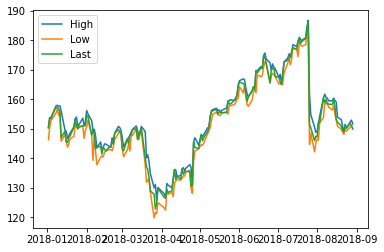

In [4]:
plt.plot(facebook_data['High'], label='High')
plt.plot(facebook_data['Low'], label='Low')
plt.plot(facebook_data['Last'], label='Last')
plt.legend()

We see that the 'High', 'Low' and 'Last' columns are not independent at all! They are correlated. So in the next sections, we'll use the 'Last' column, which makes sense because it gives us a daily picture of the stock price.

Now we have the data, we want get some insights. What is interesting when we analyze financial data is to understand why the stock price increases or why it decresases. But first we need an extra column that compares the 'last' and 'previous day price' columns. This is a good indicator of what happened during the session.

In [5]:
facebook_data['Variation'] = facebook_data['Last'] - facebook_data['Previous Day Price']
facebook_data['% Variation'] = round((facebook_data['Last'] - facebook_data['Previous Day Price']) / facebook_data['Previous Day Price'], 2)

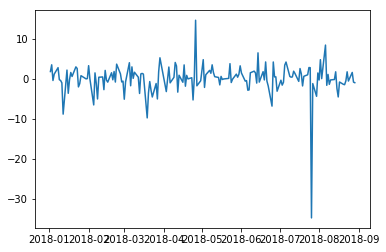

In [6]:
plt.plot(facebook_data['Variation'])

In [7]:
facebook_data['Last'].describe()

count    168.000000
mean     152.684964
std       13.331620
min      122.830000
25%      145.460000
50%      150.970000
75%      160.002500
max      186.230000
Name: Last, dtype: float64

In [8]:
newsapi_key = get_news_api_key()
api = NewsApiClient(api_key=newsapi_key)

In [12]:
test = api.get_everything(q='facebook', language='en')